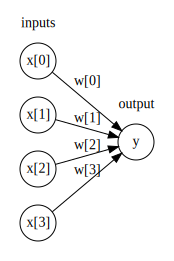

In [2]:
# 普通前馈神经网络(MLP)，简称为神经网络，是用于分类和回归的多层感知机
# MLP可以理解为是广义的线性模型
%matplotlib inline
import mglearn

# 逻辑回归的图示
mglearn.plots.plot_logistic_regression_graph()

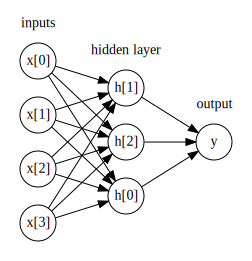

In [22]:
# MLP多次重复这个计算加权求和的过程，首先计算代表中间过程的隐单元，
# 然后再计算这些隐单元的的加权求和并得到最终结果
# 单隐层的多层感知机图示
mglearn.plots.plot_single_hidden_layer_graph()

In [5]:
# 与逻辑回归相比，单隐层的多层感知机需要学习更多的系数(也叫权重)
# 每个输入与每个隐单元(隐单元组成了隐层)之间有一个系数，每个隐单元与输出之间也有一个系数
# 在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数，
# 通常是校正非线性(校正线性单元或relu)，或正切双曲线(tanh)，
# 然后将这个函数的结果用于加权求和，计算得到输出ŷ

Text(0, 0.5, 'relui(x),tanh(x)')

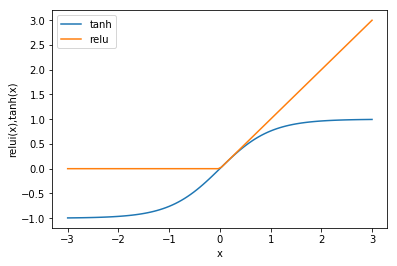

In [4]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line,0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relui(x),tanh(x)")

In [7]:
# relu截断小于0的值, tanh在输入较小时接近-1，在输入较大时接近+1

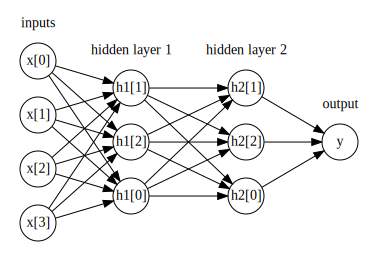

In [24]:
# 具有两个隐层的多层感知机图示
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

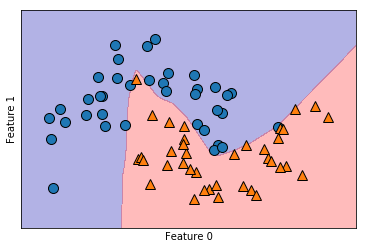

In [5]:
# 半月数据训练MLP，绘制决策边界
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

d:\pyenv\ml3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

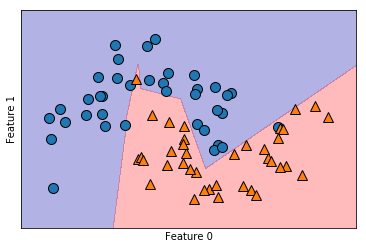

In [10]:
# hidden_layer_sizes参数用于设置隐单元数量，默认值100,减小隐单元数量可以降低模型复杂度
# 包含10个隐单元时的决策边界
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

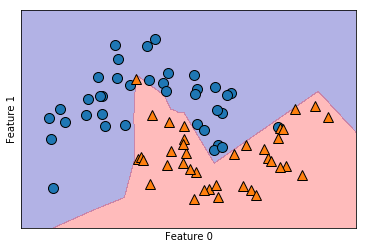

In [11]:
# 设置2个隐层，每个隐层10个隐单元
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

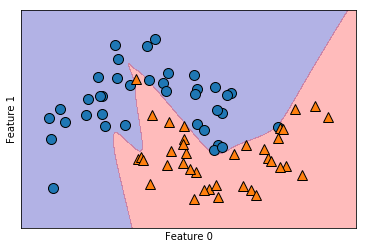

In [12]:
# activation参数用于设置非线性函数，激活函数默认是rule
# 使用tanh非线性时的决策边界
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10, 10],
                   activation='tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

d:\pyenv\ml3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


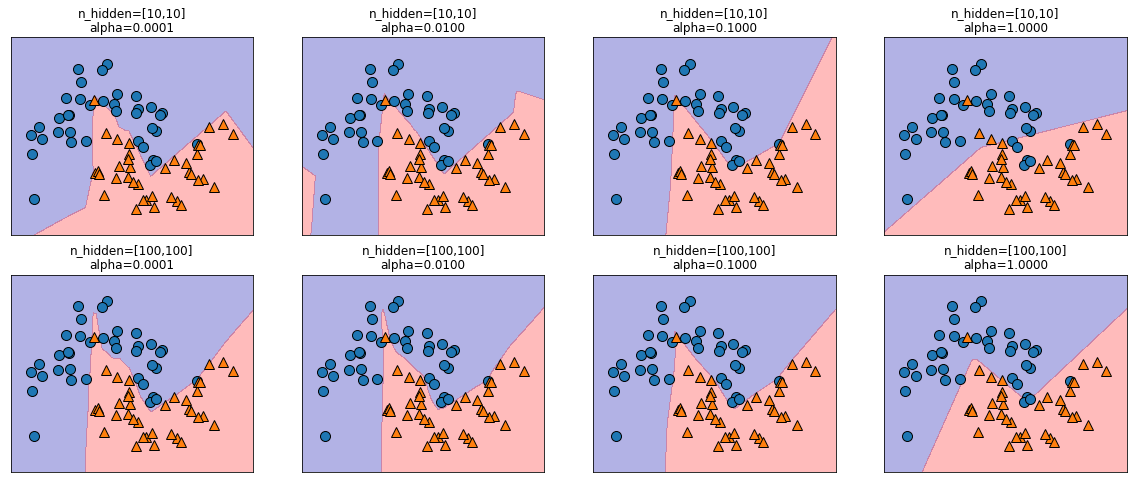

In [14]:
# alpha参数用于设置L2正则化程度,来调节模型复杂度，默认值很小(弱正则化)
fig, axes = plt.subplots(2, 4, figsize=[20,8])
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=
                            [n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,
                                            n_hidden_nodes, alpha))

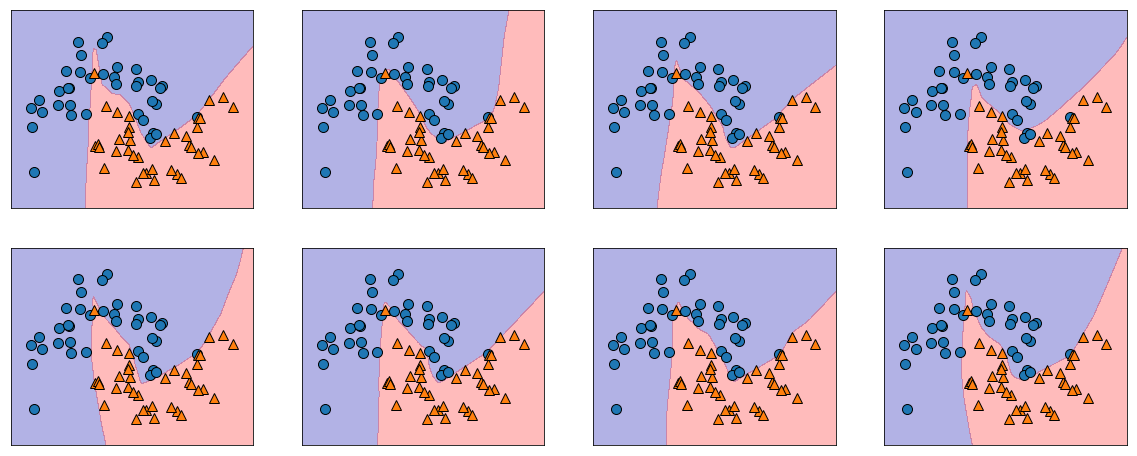

In [17]:
# 神经网络在开始学习之前每个特征的权重是随机设置的，也就是说即使使用完全相同的参数，如果
# 随机种子不同的话，也可能得到非常不一样的模型，如果网络很搭，并且复杂度选择合理的话，
# 那么应该不会对模型精度有很大影响
# solver参数用来设置学习参数的算法，默认‘adam’，大多数情况下都很好，但对数据缩放很敏感
# ‘lbfgs’鲁棒性很好，但是在大型模型或大型数据集上的时间会比较长
# ‘sgd’更高级，但需要设置许多其他参数以便获得最佳结果
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, 
                        hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

In [18]:
# 乳腺癌数据训练MLPClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on trsining set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on trsining set: 0.94
Accuracy on test set: 0.92


In [34]:
# 神经网络也要求所有输入特征的变化范围相似，最理想的情况是均值为0，方差为1
# 因此需要对数据进行缩放处理
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on trsining set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on trsining set: 0.991
Accuracy on test set: 0.965


d:\pyenv\ml3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
# 缩放之后结果明显变好，但是警告已经达到最大迭代次数
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on trsining set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on trsining set: 1.000
Accuracy on test set: 0.972


In [43]:
# 增强正则化效果,避免过拟合
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on trsining set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on trsining set: 0.988
Accuracy on test set: 0.972


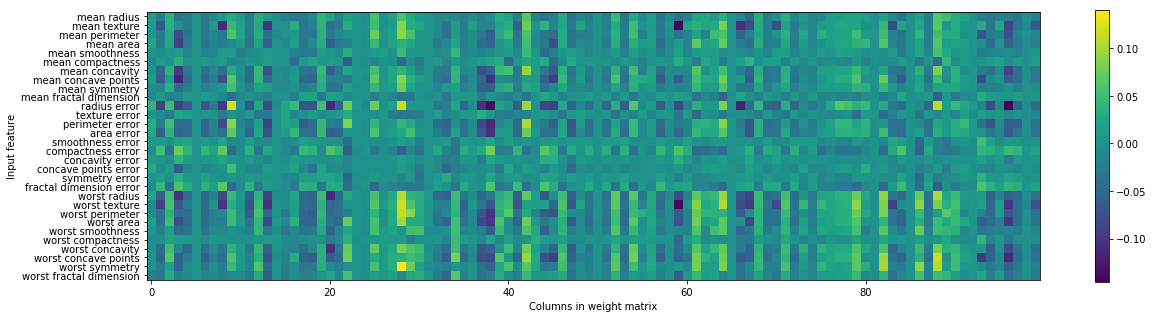

In [53]:
# 绘制神经网络在乳腺癌数据集上学到的第一个隐层权重的热图
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [54]:
# scikit-learn的神经网络只包含神经网络潜在应用的一部分
# 可以进一步研究深度学习库：tensor-flow，keras、lasagna等

In [ ]:
# 神经网络能够获取大量数据中包含的信息，并构建无比复杂的模型，
# 给它足够计算时间和数据，并且仔细调节参数，往往可以打败其它机器学习模型(无论分类和回归)
# 估计神经网络的复杂度一个有用的度量是学到的权重(系数)的个数
# 第一层：特征个数*隐单元个数  
# 第二层：隐单元个数*隐单元个数 、、、(依次类推) 
# 隐层和输出层：隐单元个数*1